In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
#%matplotlib

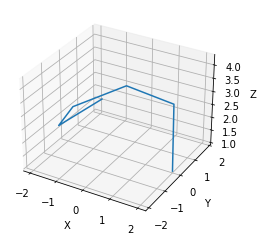

In [2]:
pos = np.array([[2, 0, 1],
       [1.08, 1.68, 2.38],
       [-0.83, 1.82, 2.49],
       [-1.97, 0.28, 2.15],
       [-1.31, -1.51, 2.59],
       [0.57, -1.91, 4.32]])

# Extract x, y, z coordinates from the list of points
x = [p[0] for p in pos]
y = [p[1] for p in pos]
z = [p[2] for p in pos]

# Plot the path connecting the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

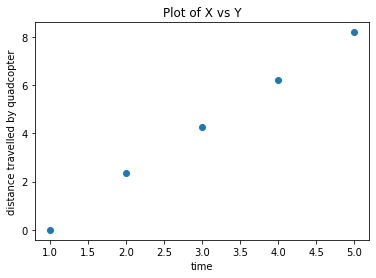

In [3]:
# Calculate the pairwise distances between the points

dist = np.array([])
d=0
for j in range(0,len(pos)-1):
       i = pos[j]
       i2 = pos[j+1]
       dist = np.append(dist,d)
       d = np.sqrt((i2[0]-i[0])**2+(i2[1]-i[1])**2+(i2[2]-i[2])**2)+d
       

np.sum(dist)/5

y = dist
x = [1,2,3,4,5]
# Plot the x and y values
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('time')
plt.ylabel('distance travelled by quadcopter')
plt.title('Plot of X vs Y')

# Show the plot
plt.show()



(5, 1)
4.209542738583052
the error is  40.992716224739695


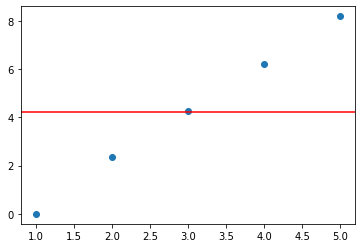

[[0.        ]
 [2.36076259]
 [4.27904307]
 [6.22501326]
 [8.18289477]]


In [4]:
Y = dist.transpose()
Y = Y.reshape(-1, 1)
X = np.array([1, 1, 1, 1, 1]).reshape(-1, 1)
print(np.shape(X))
X.transpose()
# XtX1 = np.linalg.inv(np.matmul(X.transpose(),(X)))
# XtX1X= np.matmul(XtX1,X.transpose())
# print(XtX1X*Y)
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)
# B = np.linalg.inv(X.transpose().dot(X))*X.transpose()*Y
# print(B)
plt.scatter(x, y)
print(B[0][0])
plt.axhline(y = B[0][0], color = 'r', linestyle = '-')
E = np.sum(np.power(Y-B[0][0],2))
print("the error is ", E)
plt.show()
print(Y)

In [5]:
B = np.sum(y)/len(y) #start val B
E = np.sum(((Y-B)**2))
B = B + 0.5

the error is  409.590844750988
the most likely distance travelled by the quadcopter in the next second will be: [10.2785548]


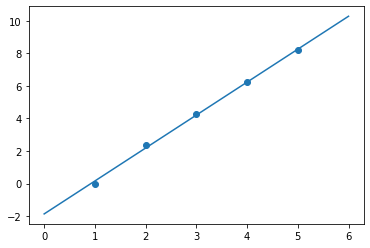

In [6]:
Y = dist.transpose()
Y = Y.reshape(-1, 1)
X = np.array([[1, 1, 1, 1, 1],[1,2,3,4,5]]).transpose()
X.transpose()
# XtX1 = np.linalg.inv(np.matmul(X.transpose(),(X)))
# XtX1X= np.matmul(XtX1,X.transpose())
# print(XtX1X*Y)
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)
# B = np.linalg.inv(X.transpose().dot(X))*X.transpose()*Y
# print(B)
E = np.sum(np.power(Y-(B[0]+B[1]*x),2))
print("the error is ", E)
plt.scatter(x, y)
xx = [0 ,1,2,3,4,5,6]
plt.plot(B[0]+B[1]*xx)
print("the most likely distance travelled by the quadcopter in the next second will be:", B[0]+B[1]*6)

In [7]:
# diff = np.empty((0,), dtype=np.ndarray)
# for i in range(len(pos)-1):
#        diff = np.append(diff,np.array(np.array(pos[i+1])- np.array(pos[i])))
# print(diff)
Ydiff = np.array([np.array(pos[1])- np.array(pos[0]), np.array(pos[2])- np.array(pos[1]), np.array(pos[3])- np.array(pos[2]), np.array(pos[4])- np.array(pos[3]), np.array(pos[5])- np.array(pos[4])])
#print(diff)
X = np.array([[1,1,1,1,1],[1,2,3,4,5]]).transpose()
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)

# Y = dist.transpose()
# Y = Y.reshape(-1, 1)
# X = np.array([[1, 1, 1, 1, 1],[1,2,3,4,5]]).transpose()
# X.transpose()
# B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),(X))),X.transpose()),Y)
# E = np.sum(np.power(Y-(B[0]+B[1]*x),2))
# print("the error is ", E)
# plt.scatter(x, y)
# xx = [0 ,1,2,3,4,5,6]
# plt.plot(B[0]+B[1]*xx)

In [8]:
# 2C
np.array([2, 0])- np.array([1.08, 1.68])


array([ 0.92, -1.68])

In [9]:
import numpy as np

def gradient_descent(start, function, gradient, learn_rate, max_iter, tol=0.001):
  x = start
  for it in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff) < tol:
      break
    print("iteration =", it, "\t\tx =", "{:.5f}".format(x), "\t\tf(x) =", "{:.3f}".format(function(x)))
    x = x - diff

# a simple function f(x) = x^2 - 4x + 1
def func(x):
  return x**2-4*x+1

# the gradient of the function
def gradient_func(x):
  return 2*x - 4


gradient_descent(9, func, gradient_func, 0.1, 100)

iteration = 0 		x = 9.00000 		f(x) = 46.000
iteration = 1 		x = 7.60000 		f(x) = 28.360
iteration = 2 		x = 6.48000 		f(x) = 17.070
iteration = 3 		x = 5.58400 		f(x) = 9.845
iteration = 4 		x = 4.86720 		f(x) = 5.221
iteration = 5 		x = 4.29376 		f(x) = 2.261
iteration = 6 		x = 3.83501 		f(x) = 0.367
iteration = 7 		x = 3.46801 		f(x) = -0.845
iteration = 8 		x = 3.17441 		f(x) = -1.621
iteration = 9 		x = 2.93952 		f(x) = -2.117
iteration = 10 		x = 2.75162 		f(x) = -2.435
iteration = 11 		x = 2.60130 		f(x) = -2.638
iteration = 12 		x = 2.48104 		f(x) = -2.769
iteration = 13 		x = 2.38483 		f(x) = -2.852
iteration = 14 		x = 2.30786 		f(x) = -2.905
iteration = 15 		x = 2.24629 		f(x) = -2.939
iteration = 16 		x = 2.19703 		f(x) = -2.961
iteration = 17 		x = 2.15763 		f(x) = -2.975
iteration = 18 		x = 2.12610 		f(x) = -2.984
iteration = 19 		x = 2.10088 		f(x) = -2.990
iteration = 20 		x = 2.08070 		f(x) = -2.993
iteration = 21 		x = 2.06456 		f(x) = -2.996
iteration = 22 		x = 2.0

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


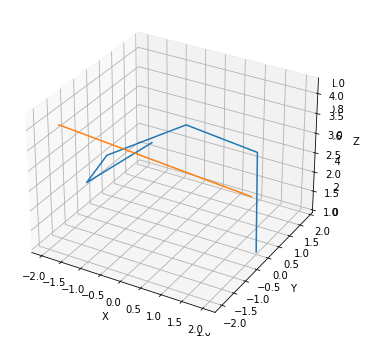

In [10]:
def f(a0, a1, t):
     #return a0 + a1*t + a2*t**2 +  a3*t**3
#         return a0+a1*t+a2*t**2
        return a0+a1*t

D = np.ones((6, 2))
for i in range(len(D)):
    D[i][1] *= i
#     D[i][2] *= i**2
#     D[i][3] *= i**3
    
print(D)
#DT=D.transpose()
#print(DT)
x=pos[:,0]
y=pos[:,1]
z=pos[:,2]
#print(x,y,z)

a0, a1= np.linalg.inv(D.T@D)@D.T@x
b0, b1= np.linalg.inv(D.T@D)@D.T@y
c0, c1= np.linalg.inv(D.T@D)@D.T@z


n100 = np.linspace(0,len(x),100)
xfit = f(a0, a1, n100)
yfit = f(b0, b1, n100)
zfit = f(c0, c1, n100)





fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
# # Plot the path connecting the points

ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(xfit, yfit, zfit)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [11]:
def gradient_descent(start,start1, function, gradient2, learn_rate, max_iter, tol, t):
  # a0 = start
  a1 = start
  a2 = start1
  for it in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff) < tol:
      break
    print("iteration =", it, "\t\ta0 =", "{:.5f}".format(a1),"\t\ta1 =", "{:.5f}".format(a2), "\t\tf(x) =", "{:.3f}".format(function(a0,a1,a2,t)))
    # a0 = a0 - diff
    a1 = a1 - diff
    a2 = a2 - diff

# a simple function f(x) = x^2 - 4x + 1
def func(a0,a1,a2,t):
  return a0+a1*t+a2*t**2

# the gradient of the function
def gradient_func2(a1,a2,t):
  return a1+2*a2*t

#%%
gradient_descent(start=1,start1=1, function=func, gradient2=gradient_func2, learn_rate=0.1, max_iter=100, tol=0.001, t=1)

NameError: name 'gradient' is not defined

In [ ]:
#for the velocity component on the X axis
def gradient_descent(start, function, gradient, learn_rate, max_iter, tol):
  # a0 = start
  x=start
  for it in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff) < tol:
      break
    print("iteration =", it, "\t\tx =", "{:.5f}".format(x))
    # a0 = a0 - diff
    x = x - diff

# a simple function f(x) = x^2 - 4x + 1
def func(t):
  return a0+a1*t

# the gradient of the function
def gfa0(a0):
    return 1



def gfa1(a1):
    return t

#%%
gradient_descent(start=1, function=func, gradient=gfa0, learn_rate=0.1, max_iter=100, tol=0.001)
for t in range(1,6):
    print("gradient for t= " , t)
    gradient_descent(start=1, function=func, gradient=gfa1, learn_rate=0.1, max_iter=100, tol=0.001)

In [ ]:
def gradient_descent(start, function, gradient, learn_rate, max_iter, tol):
  # a0 = start
  x=start
  for it in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff) < tol:
      break
    print("iteration =", it, "\t\tx =", "{:.5f}".format(x))
    # a0 = a0 - diff
    x = x - diff

# a simple function f(x) = x^2 - 4x + 1
def func(t):
  return a0+a1*t+a2*t**2

# the gradient of the function
def gfa0(a0):
    return 1


def gfa1(a1):
    return t

def gfa2(a2):
    return t**2

#%%
gradient_descent(start=1, function=func, gradient=gfa0, learn_rate=0.1, max_iter=100, tol=0.001)
for t in range(1,6):
    print("gradient for, grad_a1 , t= " , t)
    gradient_descent(start=1, function=func, gradient=gfa1, learn_rate=0.1, max_iter=100, tol=0.001)
    print("gradient for, grad_a2, t= " , t)
    gradient_descent(start=1, function=func, gradient=gfa2, learn_rate=0.1, max_iter=100, tol=0.001)

In [ ]:
#chatGPT try
import numpy as np
import matplotlib.pyplot as plt

# Define the position function
def position_func(t):
    return 2*t**3 - 3*t**2 + 4*t - 1

# Define the time interval and step size
t_start = 0
t_end = 5
h = 0.01
t = np.arange(t_start, t_end+h, h)

# Calculate the velocity and acceleration using numpy.gradient
velocity = np.gradient(position_func(t), h)
acceleration = np.gradient(velocity, h)

# Plot the results
plt.plot(t, position_func(t), label='Position')
plt.plot(t, velocity, label='Velocity')
plt.plot(t, acceleration, label='Acceleration')
plt.xlabel('Time')
plt.legend()
plt.show()

In [ ]:
pos = np.array([[2, 0, 1],
       [1.08, 1.68, 2.38],
       [-0.83, 1.82, 2.49],
       [-1.97, 0.28, 2.15],
       [-1.31, -1.51, 2.59],
       [0.57, -1.91, 4.32]])

In [ ]:
def grad_desc(x,y,vc,d0c,lrate):



    vd=0
    d0d=0
    n=len(x)

    for i,j in zip(x,y):
        vd+=-2*i*(-vc*i-d0c+j)
        d0d+=-2*(j-vc*i-d0c)

    vc=vc-lrate*vd*(1/n)
    d0c=d0c-lrate*d0d*(1/n)

    return vc, d0c




In [ ]:
# to do linear regression on the differences between the points, but in end you do not yet have direction, could be done but similar to our first approach :)

iter=1000
X = np.array([1,2,3,4,5])
Y = np.array([0, 2.36076259, 4.27904307, 6.22501326, 8.18289477])
#Y=np.array([5,7,9,11,13])
#x=np.random.randn(10,1)
#y=2*x+np.random.rand()
vc=0
d0c=0
lrate=0.0001
#print(x)
#print(y)
n=len(X)
for i in range(iter):
    vc,d0c=grad_desc(X,Y,vc,d0c,lrate)
    yp=vc*X+d0c
    loss=np.sum((Y-yp)**2)/n
    print("iteration: ", i, "loss: ", loss, "v: ", vc, " d0: ",d0c)

In [ ]:
# try linear regression on all different dims hoping to preserve direction :))
D = np.zeros([5,3])
for i in range(np.shape(pos)[0]-1):
    D[i,:] = pos[i+1,:] - pos[i,:]
iter=1000
params=np.zeros([3,3])
for i in range(np.shape(pos)[1]):
    Y = D[:,i]
    X = np.array([1,2,3,4,5])
#     Y = np.array([0, 2.36076259, 4.27904307, 6.22501326, 8.18289477])
    #Y=np.array([5,7,9,11,13])
    #x=np.random.randn(10,1)
    #y=2*x+np.random.rand()
    vc=0
    d0c=0
    lrate=0.0001
    #print(x)
    #print(y)
    n=len(X)
    for j in range(iter):
        vc,d0c=grad_desc(X,Y,vc,d0c,lrate)
        yp=vc*X+d0c
        loss=np.sum((Y-yp)**2)/n
#         print("iteration: ", j, "loss: ", loss, "v: ", vc, " d0: ",d0c)
    params[i,:] = [loss,vc,d0c]
        
print(params)     
        
        

In [ ]:
np.shape(pos)[1]

In [ ]:
# grad desc per direction

def grad_desc1(x,y,ac,vc,d0c,lrate):



    vd=0
    d0d=0
    ad=0

    for i,j in zip(x,y):
        vd+=-2*i*((-ac*i**2-vc*i-d0c)+j)
        d0d+=-2*(j-(ac*i**2+vc*i+d0c))
        ad+=-2*i**2*(j-(ac*i**2+vc*i+d0c))

    vc=vc-lrate*vd*(1/n)
    d0c=d0c-lrate*d0d*(1/n)
    ac=ac-lrate*ad*(1/n)

    return ac, vc, d0c

In [ ]:
iter=1000
X = np.array([1,2,3,4,5])
Y = np.array([0, 2.36076259, 4.27904307, 6.22501326, 8.18289477])
#Y=np.array([5,7,9,11,13])
#x=np.random.randn(10,1)
#y=2*x+np.random.rand()
vc=0
d0c=0
ac=0
lrate=0.0001
#print(x)
#print(y)
n=len(X)
for i in range(iter):
    ac,vc,d0c=grad_desc1(X,Y,ac,vc,d0c,lrate)
    yp=(ac*X**2+vc*X+d0c)
    loss=np.sum((Y-yp)**2)/n
    print("iteration: ", i, "loss: ", loss, "a:", ac, "v: ", vc, " d0: ",d0c)

In [27]:
# grad desc. per location( or time)
def grad_desc1(x,y,ac,vc,d0c,lrate):
    vd=np.array([0.0, 0.0, 0.0])
    d0d=np.array([0.0, 0.0, 0.0])
    ad=np.array([0.0, 0.0, 0.0])

    for i,j in zip(x,y):
        vd+=-2*i*((-ac*i**2-vc*i-d0c)+j)
        d0d+=-2*(j-(ac*i**2+vc*i+d0c))
        ad+=-2*i**2*(j-(ac*i**2+vc*i+d0c))

    vc=vc-lrate*vd*(1/n)
    d0c=d0c-lrate*d0d*(1/n)
    ac=ac-lrate*ad*(1/n)

    return ac, vc, d0c

X = np.array([0,1,2,3,4,5])
vc=np.array([0,0,0])
d0c=np.array([0,0,0])
ac=np.array([0,0,0])
lrate=0.001
n=len(X)
iter=10000
for i in range(iter):
    ac,vc,d0c=grad_desc1(X,pos,ac,vc,d0c,lrate)
    matrix = np.tile(d0c,(6, 1))
    mymat = X.T**2*ac.reshape((3, 1)) +X.T*vc.reshape((3, 1))
    yp= mymat.T +matrix
    loss=np.sum((pos-yp)**2)/n
#     print("iteration: ", i, "loss: ", loss, "a:", ac, "v: ", vc, " d0: ",d0c)
print("iteration: ", i, "loss: ", loss, "a:", ac, "v: ", vc, " d0: ",d0c)


iteration:  9999 loss:  0.8373566052831678 a: [ 0.39634902 -0.31945622  0.0452336 ] v:  [-2.38999923  1.00329613  0.26502218]  d0:  [2.23667694 0.48325426 1.40380699]


In [26]:
#chatGPT try
def grad_desc1(x, y, ac, vc, d0c, lrate):
    vd = np.array([0.0, 0.0, 0.0])
    d0d = np.array([0.0, 0.0, 0.0])
    ad = np.array([0.0, 0.0, 0.0])

    for i, j in zip(x, y):
        denom = -ac * i ** 2 - vc * i - d0c
        if denom.any() == 0:
            vd[:] = 0
            d0d[:] = 0
            ad[:] = 0
            continue
        vd += -2 * i * (denom + j)
        d0d += -2 * (j - denom)
        ad += -2 * i ** 2 * (j - denom)

    vc = vc - lrate * vd * (1 / n)
    d0c = d0c - lrate * d0d * (1 / n)
    ac = ac - lrate * ad * (1 / n)

    return ac, vc, d0c

X = np.array([0,1,2,3,4,5])
vc=np.array([0,0,0])
d0c=np.array([0,0,0])
ac=np.array([0,0,0])
lrate=0.001
n=len(X)
iter=1000
for i in range(iter):
    ac,vc,d0c=grad_desc1(X,pos,ac,vc,d0c,lrate)
    matrix = np.tile(d0c,(6, 1))
    mymat = X.T**2*ac.reshape((3, 1)) +X.T*vc.reshape((3, 1))
    yp= mymat.T +matrix
    loss=np.sum((pos-yp)**2)/n
#     print("iteration: ", i, "loss: ", loss, "a:", ac, "v: ", vc, " d0: ",d0c)
print("iteration: ", i, "loss: ", loss, "a:", ac, "v: ", vc, " d0: ",d0c)


iteration:  999 loss:  11.12935 a: [0. 0. 0.] v:  [0. 0. 0.]  d0:  [0. 0. 0.]


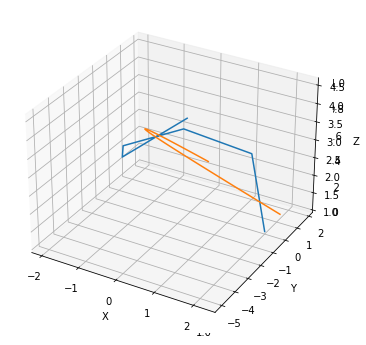

In [28]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
# # Plot the path connecting the points

ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
t = np.linspace(0,6,100)
xfitfit = ac[0]*t**2 + vc[0]*t +d0c[0]
yfitfit = ac[1]*t**2 + vc[1]*t +d0c[1]
zfitfit = ac[2]*t**2 + vc[2]*t +d0c[2]

ax.plot(xfitfit, yfitfit, zfitfit)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()